In [1]:
good = ['fair', 'excellent', 'beautiful', 'pretty', 'wonderful', 'lovely', 'gorgeous', 'handsome', 'elegant', 'charming', 'pleasing', 'cute', 'splendid', 'marvelous', 'magnificent']
bad = ['ordinary', 'crude', 'poor', 'unattractive', 'dull', 'repulsive', 'grotesque', 'ugly', 'hideous', 'awful', 'disgusting', 'horrible', 'horrid', 'foul', 'beastly']
male = ['groom', 'boy', 'his', 'he', 'man', 'dad', 'husband', 'grandfather', 'father', 'uncle', 'brother', 'son', 'grandson', 'nephew', 'king', 'prince']
femal = ['bride', 'aunt', 'princess', 'niece', 'grandmother', 'sister', 'daughter', 'wife', 'mother', 'her', 'she', 'woman', 'girl', 'mom', 'queen']

In [2]:
#以读取文件显示t-sne，
import numpy as np

X_glove = np.zeros((5892,300))
X_word = []

vec = open('Embedding_Pre/fasttext_WE_300.txt','r')
line_index = 0
for line in vec:
    index = line.index(' ')
    word = line[:index]
    vect_str = line[index+1:].split()
    vect_float = [float(x) for x in vect_str]
    vect = np.array(vect_float)
    X_word.append(word)
    X_glove[line_index,:] = vect
    line_index +=1
X_glove = X_glove[:line_index]

In [43]:
#print(X_glove[line_index-1,:])
print(X_word.index('search'))

306


In [4]:
import matplotlib.pyplot as plt
from sklearn import manifold
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X_glove)



以下是根据fcm的聚类分类结果标记每个单词的分类，然后在matlab 看聚类效果

In [12]:
clusterwords = open('words_cluster_fcm_k100_m1p05_c100.txt','r')
words = []
for line in clusterwords:
    words.append(line.replace('\n','').split(' '))
    

In [32]:
X_tsne_color = np.zeros((X_tsne.shape[0],4))
X_tsne_color[:,0:3] = X_tsne

[-28.33544159 -20.87700462 -25.17119408   0.        ]


In [45]:

for i in range(len(words)):
    for j in range(len(words[i])):
        try:
            wordIndex = X_word.index(words[i][j])
            X_tsne_color[wordIndex,3] = i + 1
            #print(words[i][j])
        except ValueError:
            pass

In [44]:
X_tsne_color[306,:]

array([-30.94007492,   5.77919912,  -0.75421655,   1.        ])

In [5]:
#保存为mat文件
import scipy.io as sio

X_1mat = np.zeros((len(good),4))
X_1mat_index = 0
for word in good:
    vecid = X_word.index(word)
    X_1mat[X_1mat_index,:3] = X_tsne[vecid,:]
    X_1mat[X_1mat_index,3:4] = 1
    X_1mat_index +=1

X_2mat = np.zeros((len(bad),4))
X_2mat_index = 0
for word in bad:
    vecid = X_word.index(word)
    X_2mat[X_2mat_index,:3] = X_tsne[vecid,:]
    X_2mat[X_2mat_index,3:4] = 0
    X_2mat_index +=1   
    
    
X_mat = np.vstack((X_1mat,X_2mat))

In [46]:
sio.savemat('fasttext_good_bad.mat',{'Embedding':X_mat,'Allwords':X_tsne_color})

print(X_mat)

[[ -8.78415871   6.64202499 -45.77281952   1.        ]
 [  0.6921823   11.12047863 -40.8196907    1.        ]
 [  5.32134628  16.71584702 -38.04060364   1.        ]
 [-13.18691349  19.49828339 -35.19655228   1.        ]
 [  2.7622261   12.59510422 -39.13491821   1.        ]
 [  4.14494896  15.01277065 -39.42596054   1.        ]
 [  6.18764305  14.62655544 -38.24407196   1.        ]
 [  8.26446247  16.79280853 -38.12714767   1.        ]
 [  5.98080158  17.5760231  -35.38808441   1.        ]
 [  6.00137663  17.61112976 -40.79008102   1.        ]
 [  1.86326969  17.3478508  -41.80352783   1.        ]
 [  9.93762493  16.22182846 -41.53398132   1.        ]
 [  2.20881104  13.30840778 -36.51000595   1.        ]
 [  3.33040094  11.04235268 -37.69023514   1.        ]
 [  4.01555204  13.48358631 -36.12337875   1.        ]
 [ -2.32908177  -2.05929899 -33.50580978   0.        ]
 [  8.77167416   4.78236246 -35.49397278   0.        ]
 [  3.66453266  19.99782562 -26.56574249   0.        ]
 [  9.1352

In [102]:
# Scale and visualize the embedding vectors                            
def plot_embedding2(X, X_color,words,title=None):     
    #x_min, x_max = np.min(X, 0), np.max(X, 0)
    #X = (X - x_min) / (x_max - x_min)                           
    
    for i in range(X.shape[0]):                          
    #plt.text(X[i, 0], X[i, 1], "5",    
    #         color='coral',         
    #         fontdict={'weight': 'bold', 'size': 9})
        plt.plot(X[i,0],X[i,1],color=X_color[:,i], marker='o')
        plt.text(X[i,0],X[i,1],str(words[i]))
    
    #plt.figure()              
    #ax = plt.subplot(111)      

    
    #plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [103]:
X_1 = np.zeros((len(good),2))
X_1_Color = np.zeros((3,len(good)))
X_1_index = 0
for word in good:
    vecid = X_word.index(word)
    X_1[X_1_index,:] = X_tsne[vecid,:]
    X_1_Color[:,X_1_index] = [1,0.0,0.0]
    X_1_index +=1

In [104]:
X_2 = np.zeros((len(bad),2))
X_2_Color = np.zeros((3,len(bad)))
X_2_index = 0
for word in bad:
    vecid = X_word.index(word)
    X_2[X_2_index,:] = X_tsne[vecid,:]
    X_2_Color[:,X_2_index] = [0.0,0.0,1.0]
    X_2_index +=1
    

In [105]:
X = np.vstack((X_1,X_2))
print(X.shape)
X_Color = np.hstack((X_1_Color,X_2_Color))
print(X_Color.shape)
X_word = good+bad
print(X_word)

(30, 2)
(3, 30)
['fair', 'excellent', 'beautiful', 'pretty', 'wonderful', 'lovely', 'gorgeous', 'handsome', 'elegant', 'charming', 'pleasing', 'cute', 'splendid', 'marvelous', 'magnificent', 'ordinary', 'crude', 'poor', 'unattractive', 'dull', 'repulsive', 'grotesque', 'ugly', 'hideous', 'awful', 'disgusting', 'horrible', 'horrid', 'foul', 'beastly']


In [86]:
print(X_1.shape)
print(X_1_Color)
print(good)

(15, 2)
[[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
   0.5]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
   0.5]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
   0.5]]
['fair', 'excellent', 'beautiful', 'pretty', 'wonderful', 'lovely', 'gorgeous', 'handsome', 'elegant', 'charming', 'pleasing', 'cute', 'splendid', 'marvelous', 'magnificent']


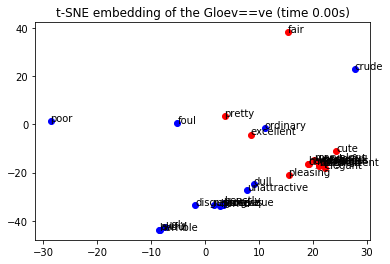

In [106]:
plot_embedding2(X, X_Color,X_word,                                  
            "t-SNE embedding of the Gloev==ve (time %.2fs)" %
               0.0)                           

plt.show() 